In [1]:
import pandas as pd # Import pandas (csv reader)
import numpy as np # Import numpy
import matplotlib.pyplot as plt # Import plots for visualization (cool graphs)

data = pd.read_csv("./datasets/pokemon.csv") # Use pandas to read dataset

data.head() # Test dataset by listing the head (first 5 entries)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [2]:
data.isnull().sum() # Check for any empty values

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

## QUESTION 1


In [3]:

# Select the 'Name' and 'Attack' columns from the 'data
# and use the 'sort_values()' function to sort them by their 'Attack' stat in a descending manner.
top_10_attack = data[data['Legendary'] == False][['Name', 'Attack']].sort_values(by='Attack', ascending=False).head(10) # top_10_attack is what we call a Data Frame

top_10_attack

,Name,Attack
163,Mega Mewtwo X,190
232,Mega Heracross,185
424,Primal Groudon,180
426,Mega Rayquaza,180
429,DeoxysAttack Forme,180
711,Kyurem Black Kyurem,170
494,Mega Garchomp,170
527,Mega Gallade,165
387,Mega Banette,165
454,Rampardos,165


### Now let's turn the Data Frame into a bar graph


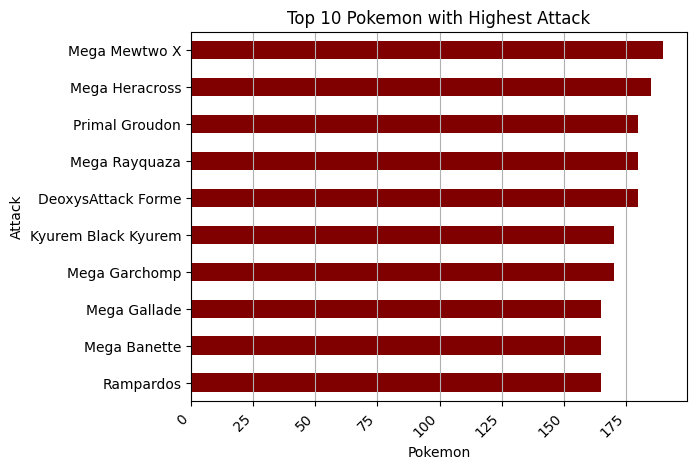

In [4]:
top_10_attack.set_index('Name').plot(kind='barh', y='Attack', color='maroon', legend=False)

plt.title("Top 10 Pokemon with Highest Attack") # Cool title
plt.xlabel("Pokemon") # Row Labels
plt.ylabel("Attack") # Column Labels

plt.xticks(rotation=45, ha='right') # Rotate the graph
plt.grid(axis='x') # Grids
plt.gca().invert_yaxis() # Invert the graph to fix the order of indexes (due to being rotated)
plt.show() # Show graph

## QUESTION 2


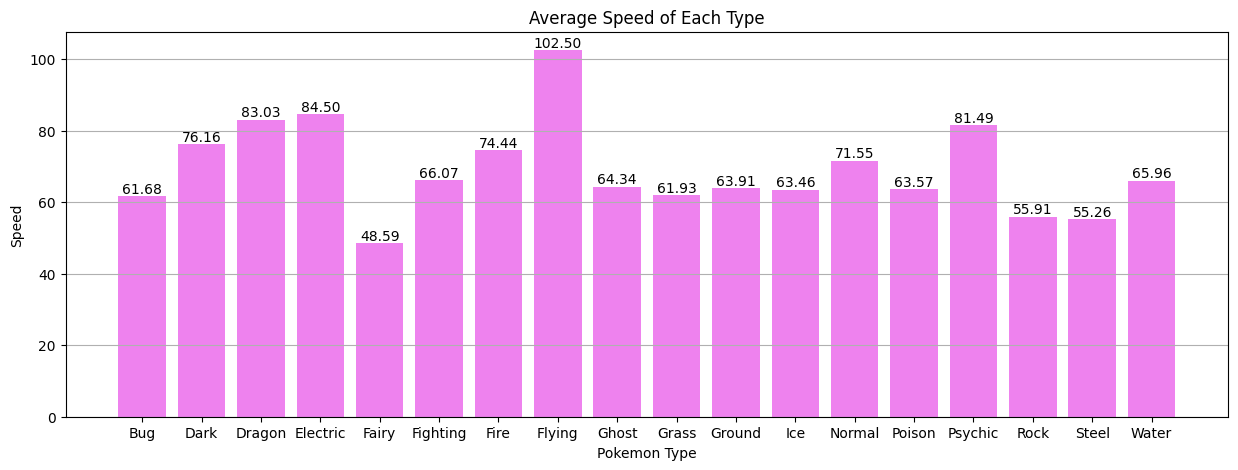

In [5]:
# Group Pokemon by their primary type and list the types' average speed
types = data.groupby(["Type 1"])["Speed"].mean().round(2).reset_index() # Use only 2 decimal places by using 'round(2)'

fig, ax = plt.subplots(figsize=(15, 5)) # Makes a subplot, which returns two objects, and axes and a figure, and store it respectively to two variables.
patches = ax.bar(types["Type 1"], types["Speed"], color='violet') # Makes patches(bars) out of our types data frame

plt.title('Average Speed of Each Type') # Cool title
plt.xlabel('Pokemon Type') # Row Labels
plt.ylabel('Speed') # Column Labels
plt.grid(axis='y') # Grids

for patch in patches: 
    ax.annotate(f'{patch.get_height():.2f}', # Gets the value of the current bar(which is basically the height)
                (patch.get_x() + patch.get_width() / 2., patch.get_height()), # Gets the center of the bar and the top of the bar
                ha='center', # Sets text horizontal alignment to center
                va='center', # Sets vertical alignment to center
                xytext=(0,5), #  Sets the offset of the annotation from the given xy coordinates (IMPORTANT!)
                textcoords='offset points') # Sets the coordinate system for xytext to offset points(xy system)

plt.show() # Display the plot




## QUESTION 3


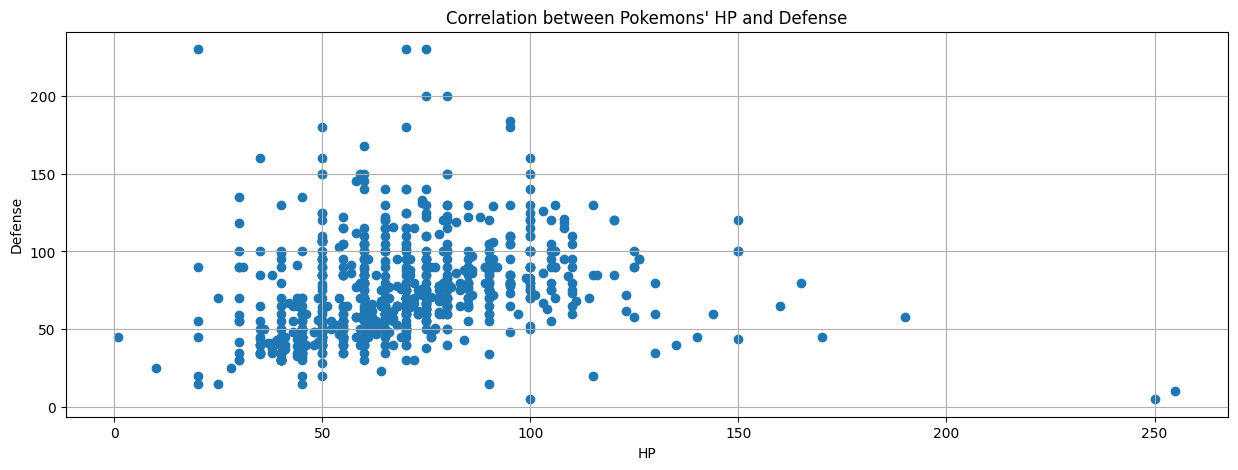

Correlation Coefficient: 0.23962231884672586


In [11]:
fig = plt.figure(figsize=(15,5)) # Set the figure size

plt.scatter(data["HP"], data["Defense"]) # We can immediately make a scatter plot from the 'data' Dataframe (This is the easiest question from the 5 questions imo)
plt.title("Correlation between Pokemons' HP and Defense") # Cool Title
plt.xlabel("HP") # Horizontal label
plt.ylabel("Defense") # Vertical label
plt.grid(True) # Setting the grid to 'True' makes it have grids for x & y

plt.show() # Display the plot

# Calculate the Correlation Coefficient
correlation = data["HP"].corr(data["Defense"]) # Easily, use the .corr()
print("Correlation Coefficient:", correlation)

## Question 4


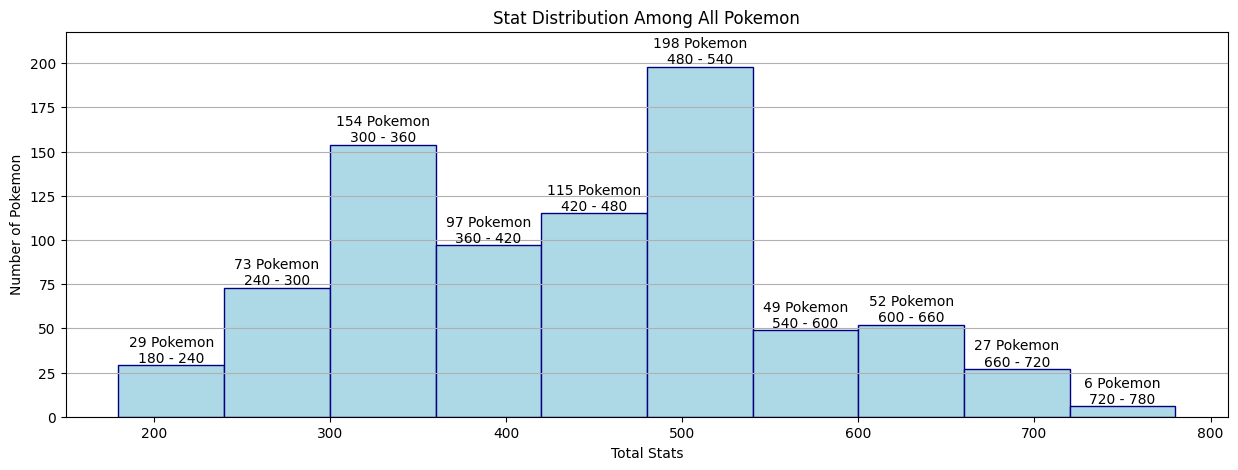

In [78]:
# Add all stats of each pokemon and put them inside a 'Total' column
data['Total'] = data[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]].sum(axis=1)

fig = plt.figure(figsize=(15,5))

# Based on my understanding, plt.hist() returns 3 objects:
# n = Array of numbers of data(Pokemon) that falls under each bin
# bins = Array of edges of bins (Not the number of bins, but the number of edges of bins)
# patches = Basically the shapes(bars) of the graph.
n, bins, patches = plt.hist(data["Total"], bins=10, color="lightblue", edgecolor="navy")
plt.title("Stat Distribution Among All Pokemon")
plt.xlabel("Total Stats")
plt.ylabel("Number of Pokemon")
plt.grid(axis='y')

for i in range(len(patches)): 

    # Define the text we want to display
    bin_range = f'{bins[i]:.0f} - {bins[i+1]:.0f}' # Range of bins
    bin_height = f'{int(n[i])} Pokemon' # Number of pokemon, which is basically the height of the bin

    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, # Basically just gets the center of each bin for correct label placement
             n[i], # Height of the patch(bar)
             f'{bin_height}\n{bin_range}', # Labels for each bin
             ha='center', va='bottom'), # Sets horizontal and vertical alignment of the label
    

plt.ylim(0, max(n) * 1.1) # Don't worry about this btw, this is just to fit the labels that are too high up
plt.show()


## QUESTION 5


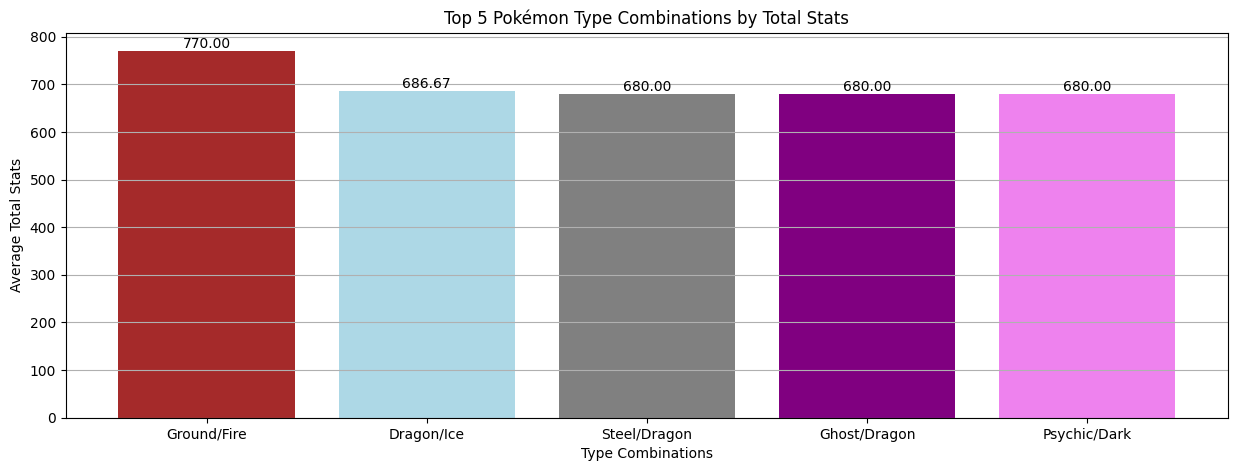

In [48]:
# Here, we're reusing the dataframe from Question 4 where we have an added 'Total' Column. No need to redeclare it.

# Group Pokemon by each different type combinations and list them with their 'Total' columns
type_combination = data.groupby(["Type 1", "Type 2"])["Total"].mean().reset_index()

# Sort the 'Total' column of the type combinations list from highest to lowest and store the first 5 entires from that list
top_types = type_combination.sort_values("Total", ascending=False).head(5)

# Plot a bar graph grouped by Type 1 and Type 2 of the 'Total' column of the top_types
fig, ax = plt.subplots(figsize=(15,5))

colors = ["brown", "lightblue", "gray", "purple", "violet"] # Define patch(bars) colors
type_labels = top_types["Type 1"].astype(str) + '/' + top_types["Type 2"].astype(str) # You dont have to worry about this part, it just handles the labeling of indexes with Type 1 / Type 2
patches = ax.bar(type_labels, top_types["Total"], color=colors) # Makes patches(bars) out of our top_types data frame

# Design the bar graph with matplotlib's pyplot module
plt.title('Top 5 Pokémon Type Combinations by Total Stats') # Cool title
plt.xlabel('Type Combinations') # Row labels
plt.ylabel('Average Total Stats') # Column labels
plt.grid(axis='y') # Grids

# Don't be afraid of this code block here, it just handles the value that displays above the patches(bars):
for patch in patches: 
    ax.annotate(f'{patch.get_height():.2f}', # Gets the value of the current bar(which is basically the height)
                (patch.get_x() + patch.get_width() / 2., patch.get_height()), # Gets the center of the bar and the top of the bar
                ha='center', va='center', # Sets horizontal and vertical alignment to center
                xytext=(0,5), #  Sets the offset of the annotation from the given xy coordinates (IMPORTANT!)
                textcoords='offset points') # Sets the coordinate system for xytext to offset points(xy system)

plt.show() # Display the plot